In [208]:
%pip install kmodes scikit-learn-extra 


: 

## Imports

In [ ]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

# Non-Hierarchical Clustering Models
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes
from sklearn.cluster import DBSCAN
from sklearn.cluster import BisectingKMeans
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
import umap
from sklearn.manifold import TSNE

# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
path = '../datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx'

In [ ]:
df = pd.read_excel(path)

In [ ]:
demographics = df[['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability', 'states']]
demographics.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,new York


In [ ]:
# demographics = df[['sample_1','sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7','sample_8']]

## <a id='toc1_1_'></a>[Encoding | Scaling](#toc0_)

In [ ]:
demographics_encoded = pd.get_dummies(demographics)

In [ ]:
demographics_encoded.shape # type: ignore

(50, 60)

In [ ]:
scaler = StandardScaler()
demographics_scaled = scaler.fit_transform(demographics_encoded)

In [ ]:
# demographics_encoded.to_excel('demographics_encoded.xlsx', index=False)

## <a id='toc1_2_'></a>[Agglomerative Hierarchical Clustering](#toc0_)

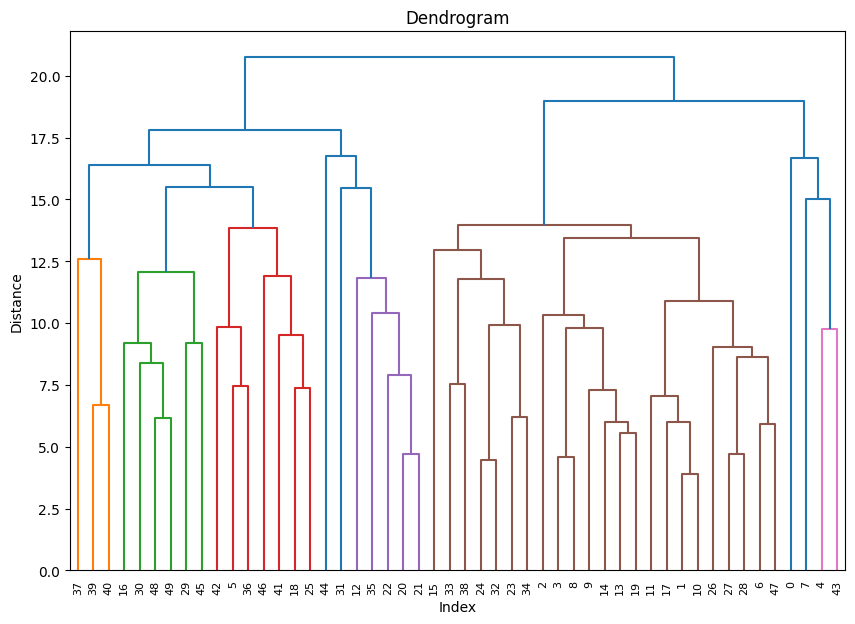

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

clusters = agg_clustering.fit_predict(demographics_scaled)
linked = linkage(demographics_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df.index, distance_sort='ascending')
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Calculate cophenetic correlation coefficient
c, coph_dists = cophenet(linked, pdist(demographics_scaled))
print(f"Cophenetic Correlation Coefficient: {c}")


Cophenetic Correlation Coefficient: 0.4826501064852144


In [ ]:
agg_df = demographics.copy()

In [ ]:
agg_df['Cluster'] = clusters

In [ ]:
clusters

array([1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 3, 2, 0, 0,
       0, 2, 2, 3, 2, 2, 2, 3, 3, 0, 2, 2, 2, 0, 3, 3, 2, 3, 3, 3, 3, 1,
       0, 3, 3, 2, 3, 3], dtype=int64)

In [ ]:
agg_choices = demographics.copy()
agg_choices['Cluster'] = clusters

In [ ]:
agg_choices.head(2)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,Cluster
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,1
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,2


In [ ]:
X = demographics_scaled

# Define parameters to tune
linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'manhattan', 'cosine']
n_clusters_range = range(2, 50)  # Adjust based on your dataset and requirements

# Lists to store results
best_silhouette_score = -1
best_params = {}


# Perform parameter tuning
for linkage in linkage_methods:
    for affinity in affinity_metrics:
        # Skip combinations that are incompatible
        if (linkage == 'ward' and affinity != 'euclidean'):
            continue
        
        for n_clusters in n_clusters_range:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=affinity)
            cluster_labels = model.fit_predict(X)
            silhouette_avg = silhouette_score(X, cluster_labels)
            
            # Track the best parameters based on silhouette score
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_params = {'linkage': linkage, 'affinity': affinity, 'n_clusters': n_clusters}

# Output the best parameters found
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best Parameters: {'linkage': 'complete', 'affinity': 'euclidean', 'n_clusters': 2}
Best Silhouette Score: 0.29246377023639036


### <a id='toc1_2_1_'></a>[K Modes -----](#toc0_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 408.0
Run 1, iteration: 2/100, moves: 0, cost: 408.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 412.0
Run 2, iteration: 2/100, moves: 3, cost: 410.0
Run 2, iteration: 3/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 408.0
Run 4, iteration: 2/100, moves: 1, cost: 408.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 410.0
Run 5, iteration: 2/100, moves: 3, cost: 410.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mo

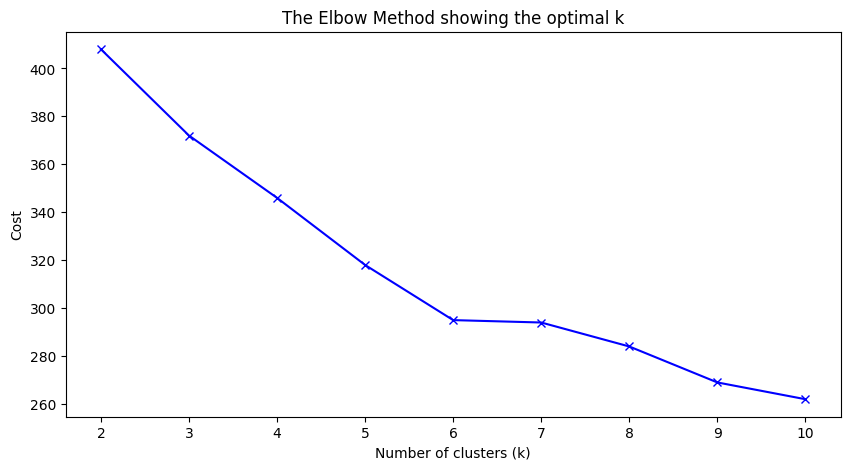

In [ ]:
# Elbow method and silhouette scores for KModes
cost = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
    clusters = kmodes.fit_predict(demographics_encoded)
    cost.append(kmodes.cost_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=50, max_iter=500)

# Fit the KMeans model to the demographics_encoded dataset
kmeans.fit(demographics_encoded)

KMeans(max_iter=500, n_clusters=6, n_init=50, random_state=42)

## <a id='toc1_4_'></a>[PCA-----](#toc0_)

In [ ]:
pca = PCA(n_components=2)
demographics_pca = pca.fit_transform(demographics_encoded)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

### <a id='toc1_4_1_'></a>[Elbow Method](#toc0_)

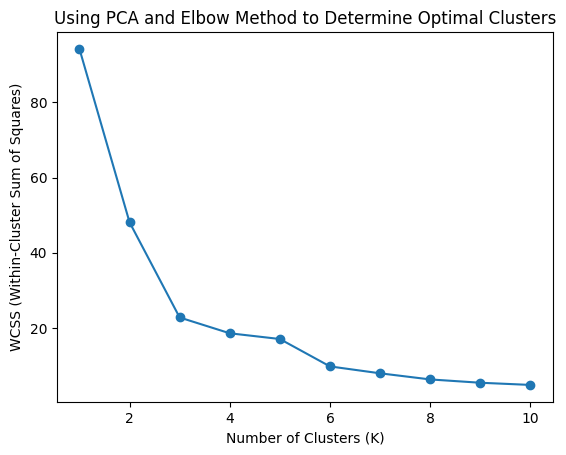

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(demographics_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### <a id='toc1_4_2_'></a>[Silhouette Score](#toc0_)

For n_clusters = 2, the average silhouette score is: 0.45
For n_clusters = 2, the Calinski-Harabasz index is: 46.00
For n_clusters = 2, the Davies-Bouldin score is: 0.90


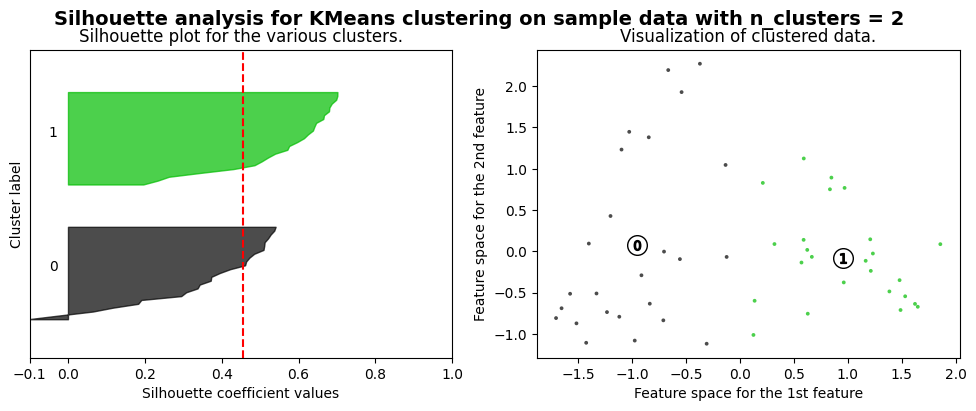

For n_clusters = 3, the average silhouette score is: 0.53
For n_clusters = 3, the Calinski-Harabasz index is: 73.66
For n_clusters = 3, the Davies-Bouldin score is: 0.60


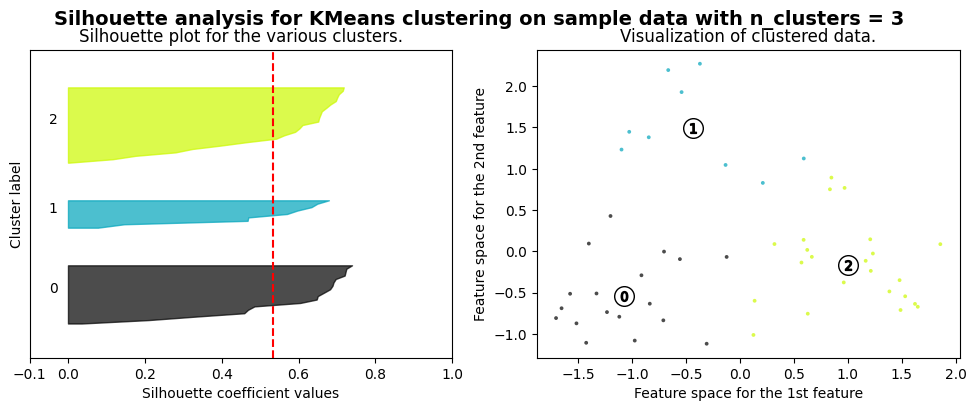

For n_clusters = 4, the average silhouette score is: 0.41
For n_clusters = 4, the Calinski-Harabasz index is: 62.40
For n_clusters = 4, the Davies-Bouldin score is: 0.82


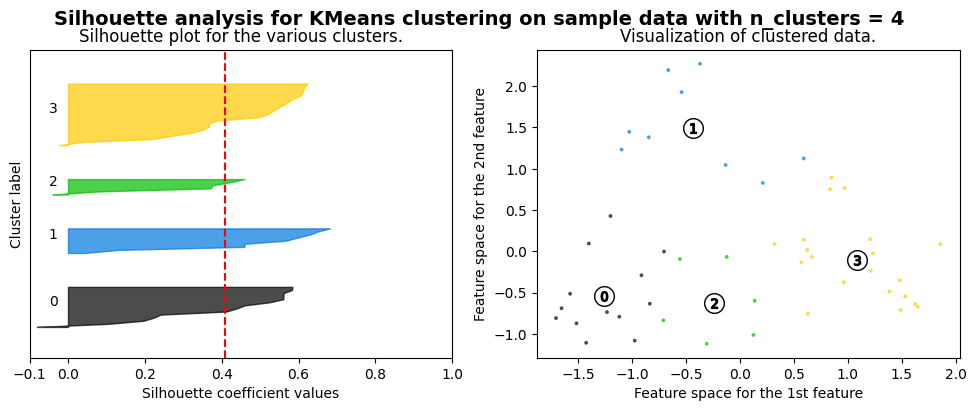

For n_clusters = 5, the average silhouette score is: 0.38
For n_clusters = 5, the Calinski-Harabasz index is: 50.87
For n_clusters = 5, the Davies-Bouldin score is: 0.89


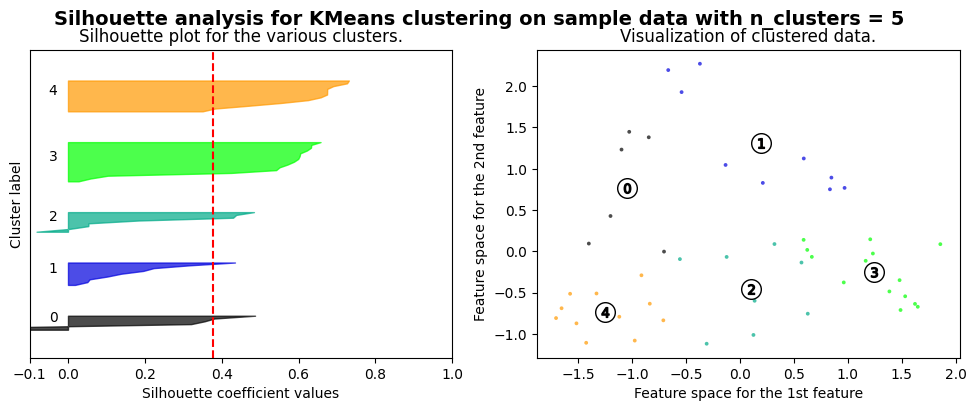

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(demographics_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(demographics_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(demographics_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(demographics_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(demographics_pca[:, 0], demographics_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Compute and print the Calinski-Harabasz index and Davies-Bouldin score
    calinski_harabasz = calinski_harabasz_score(demographics_pca, cluster_labels)
    davies_bouldin = davies_bouldin_score(demographics_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is: {calinski_harabasz:.2f}")
    print(f"For n_clusters = {n_clusters}, the Davies-Bouldin score is: {davies_bouldin:.2f}")

    plt.show()

### <a id='toc1_4_3_'></a>[Initialization](#toc0_)

In [ ]:
# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=3, n_init='auto')
cluster_labels_pca = kmeans.fit_predict(demographics_pca)
# look at correlation between people and tone preferences

### <a id='toc1_4_4_'></a>[Data Points in clusters](#toc0_)

In [ ]:
unique, counts = np.unique(cluster_labels_pca, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 9, 1: 23, 2: 18}


### <a id='toc1_4_5_'></a>[Visualizing Clusters](#toc0_)

In [ ]:
cluster_labels_pca

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2])

In [ ]:
pca_df = demographics.copy()

In [ ]:
pca_df['Cluster'] = cluster_labels_pca

In [ ]:
pca_df.head(5)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,Cluster
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,2
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,1
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,new York,1
3,25-34,female,hispanic,na,Associate,single,"Less than $25,000",Employed Part time,both,i do not have a disability,illinois,1
4,18-24,male,hispanic,native american,Bachelor,single,"$25,000 - $49,999",Student,both,na,illinois,1


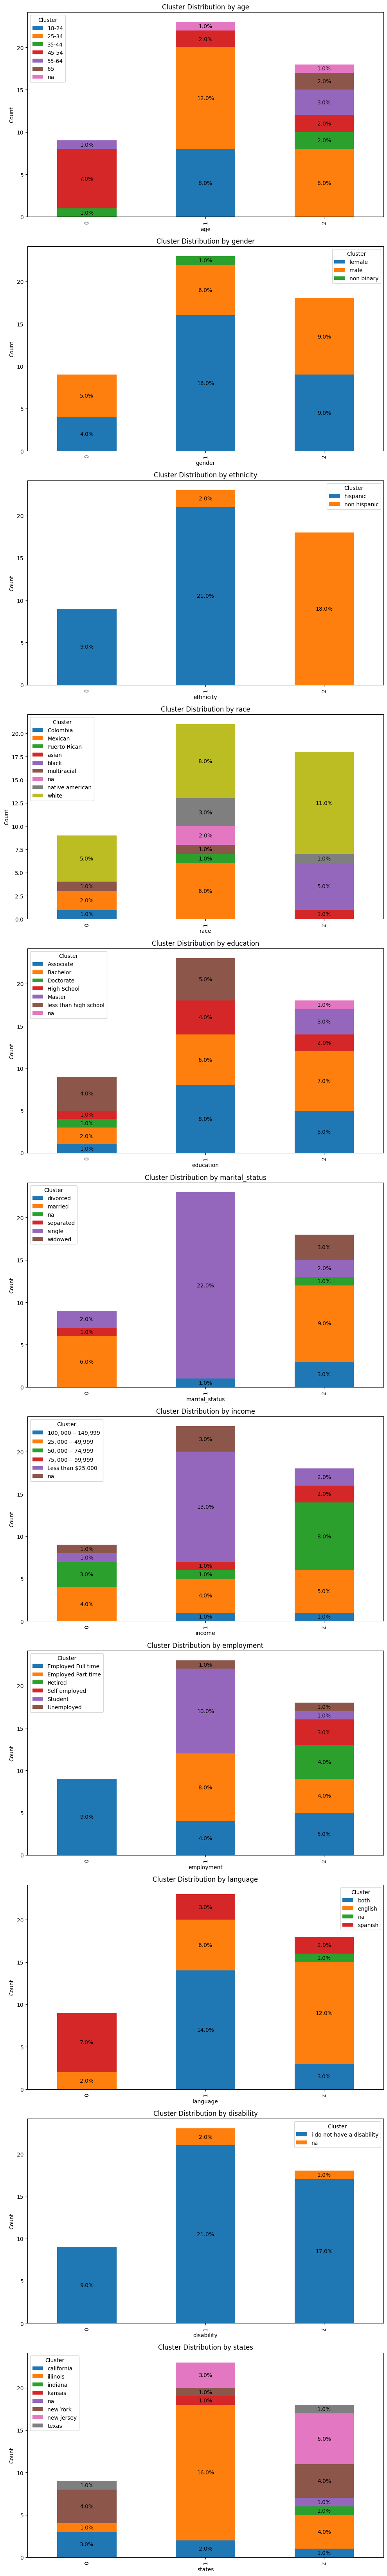

In [ ]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = pca_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')
    # plt.savefig((f'pca/{attribute}_cluster_distribution.png'))

plt.tight_layout()
plt.show()

### <a id='toc1_4_6_'></a>[Bisecting KMeans](#toc0_)

For n_clusters = 2, the average silhouette score is: 0.45417978986632507


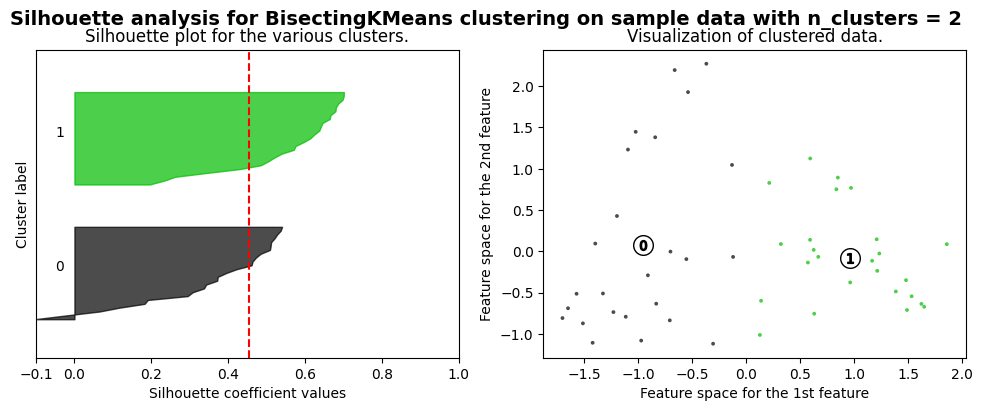

For n_clusters = 3, the average silhouette score is: 0.5368582534901502


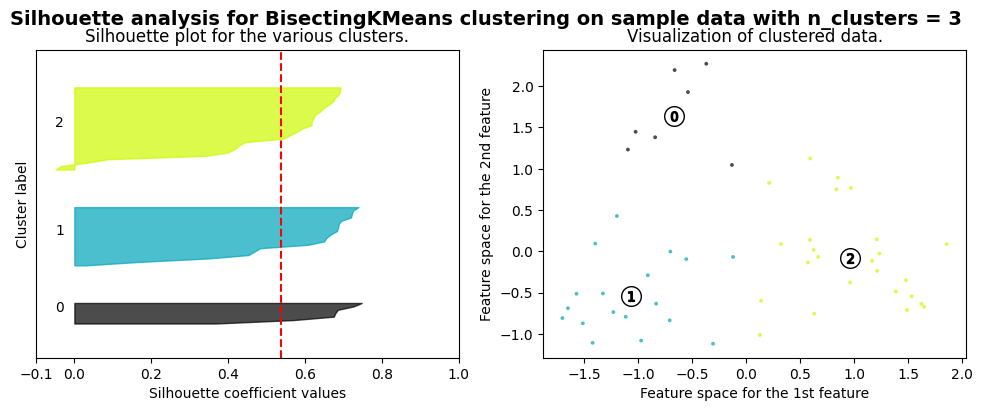

For n_clusters = 4, the average silhouette score is: 0.3716122795029858


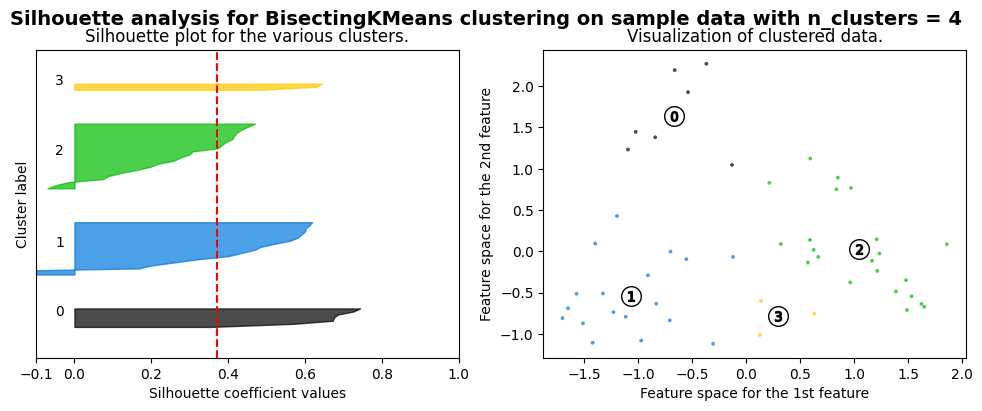

For n_clusters = 5, the average silhouette score is: 0.4456781009861577


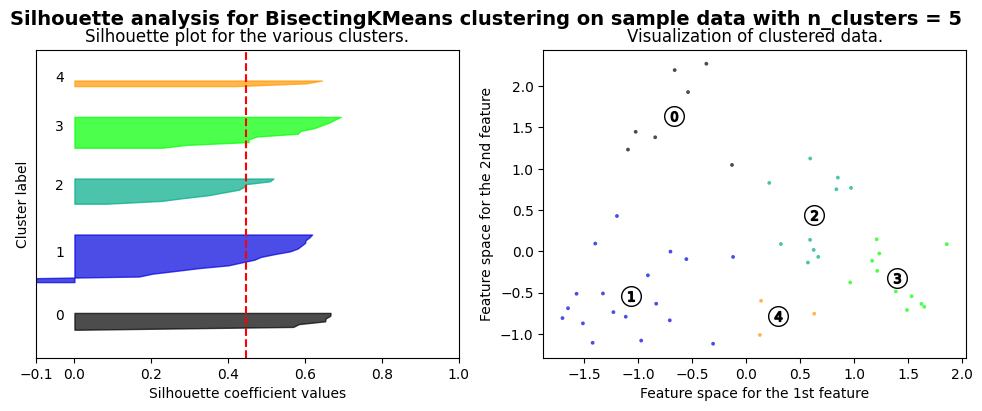

In [ ]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Initialize Bisecting KMeans object and fit it to the data
    bisect_kmeans = BisectingKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = bisect_kmeans.fit_predict(demographics_pca)
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(demographics_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Calculate the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(demographics_pca, cluster_labels)

    # Plotting silhouette score
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(demographics_pca) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(demographics_pca[:, 0], demographics_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = bisect_kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for BisectingKMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

    plt.show()

### <a id='toc1_4_7_'></a>[T-SNE Dimensionality Reduction-------](#toc0_)

In [ ]:
tsne = TSNE(n_components=2)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(demographics_encoded) # type: ignore

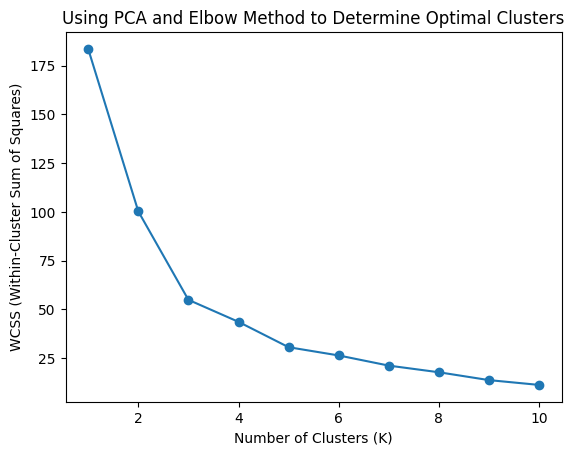

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.4031978249549866
For n_clusters = 3, the average silhouette score is: 0.4487896263599396
For n_clusters = 4, the average silhouette score is: 0.40468844771385193
For n_clusters = 5, the average silhouette score is: 0.4051968455314636


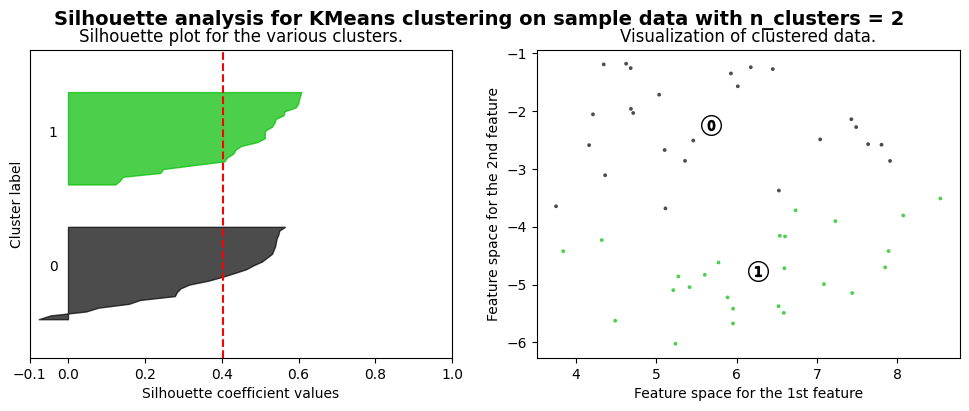

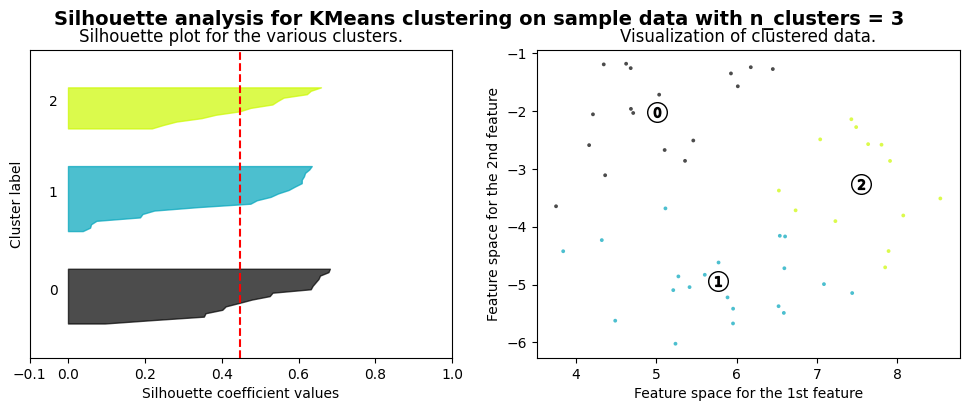

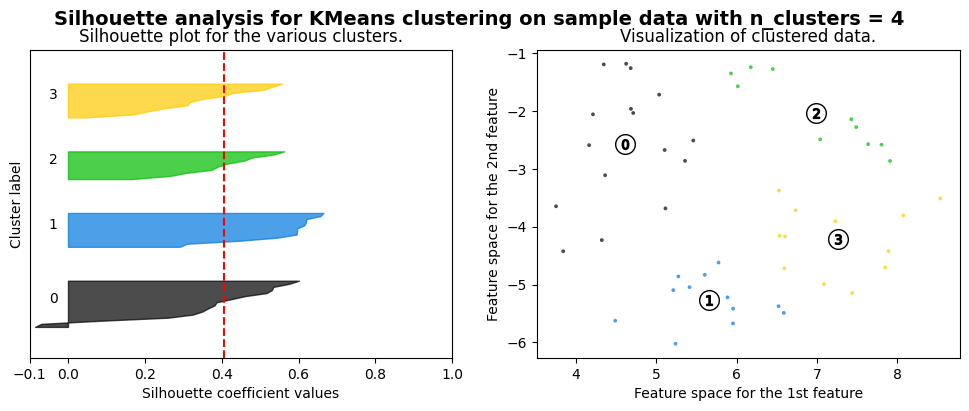

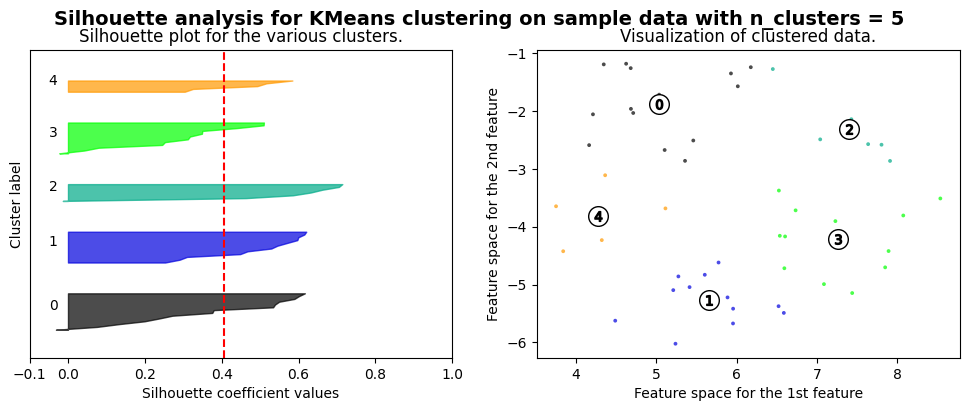

In [ ]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_tsne)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

### <a id='toc1_4_8_'></a>[Initialization](#toc0_)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels_tsne = kmeans.fit_predict(X_tsne)

In [ ]:
silhouette_avg = silhouette_score(X_tsne, cluster_labels_tsne)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.4487896263599396


In [ ]:
ch_score = calinski_harabasz_score(X_tsne, cluster_labels_tsne)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 55.199651650760856


In [ ]:
db_score = davies_bouldin_score(X_tsne, cluster_labels_tsne)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.7381874182766704


### <a id='toc1_4_9_'></a>[Data Points in Clusters](#toc0_)

In [ ]:
unique, counts = np.unique(cluster_labels_tsne, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 17, 1: 20, 2: 13}


### <a id='toc1_4_10_'></a>[Visualing Clusters](#toc0_)

In [ ]:
tsne_df = demographics.copy()

In [ ]:
tsne_df['Cluster'] = cluster_labels_tsne

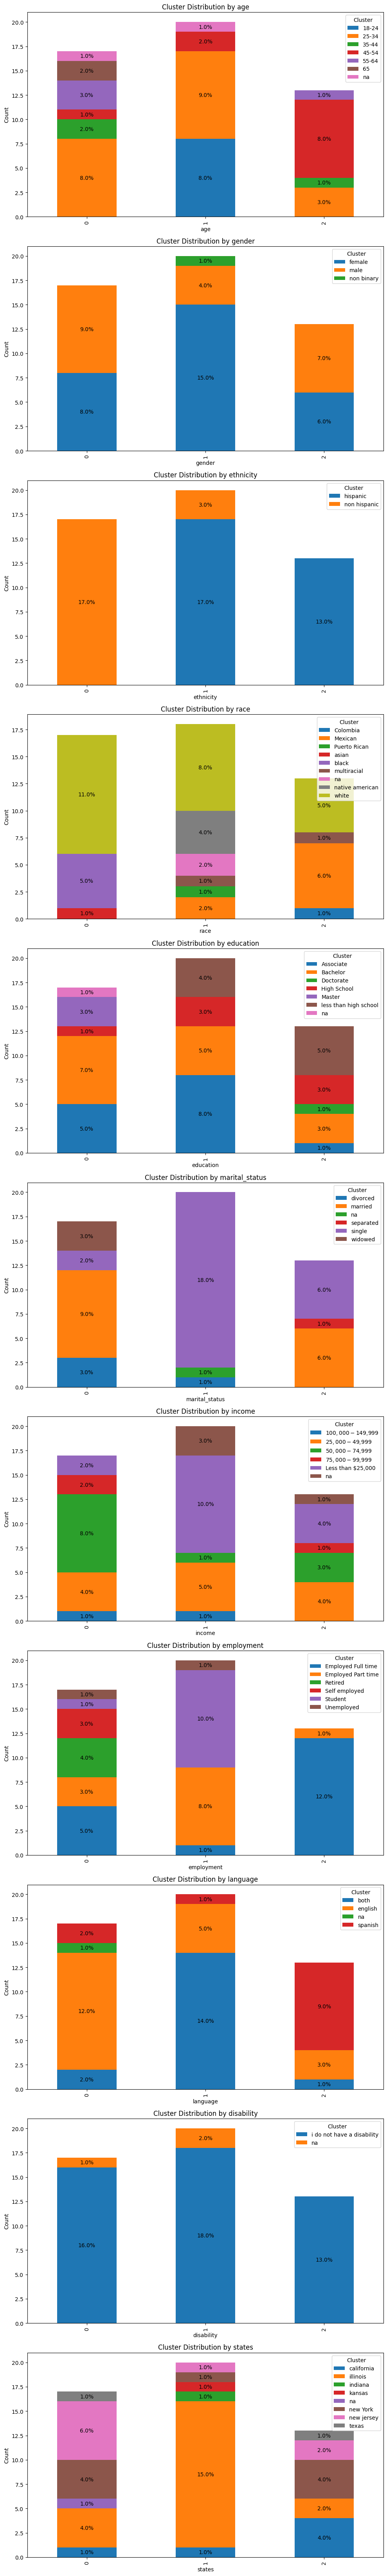

In [ ]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = tsne_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')

plt.tight_layout()
plt.show()

### <a id='toc1_4_11_'></a>[UMAP Dimensionality Reduction ----](#toc0_)

In [ ]:
umap_model = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
X_umap = umap_model.fit_transform(demographics_encoded)

For n_clusters = 2, the average silhouette score is: 0.45991724729537964
For n_clusters = 3, the average silhouette score is: 0.536516010761261
For n_clusters = 4, the average silhouette score is: 0.48465344309806824
For n_clusters = 5, the average silhouette score is: 0.40019989013671875
For n_clusters = 6, the average silhouette score is: 0.40301498770713806
For n_clusters = 7, the average silhouette score is: 0.3786233961582184
For n_clusters = 8, the average silhouette score is: 0.38555803894996643


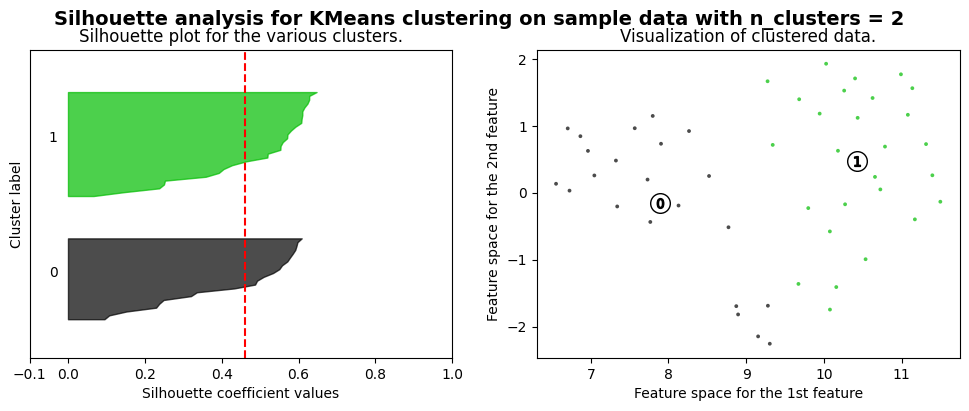

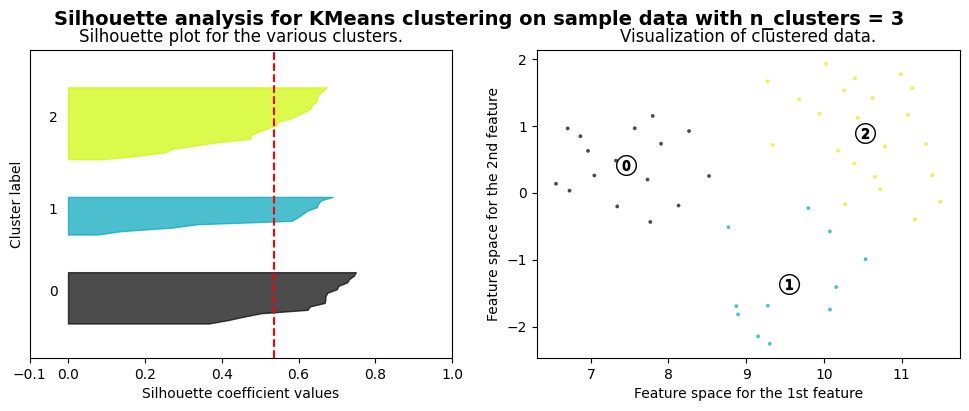

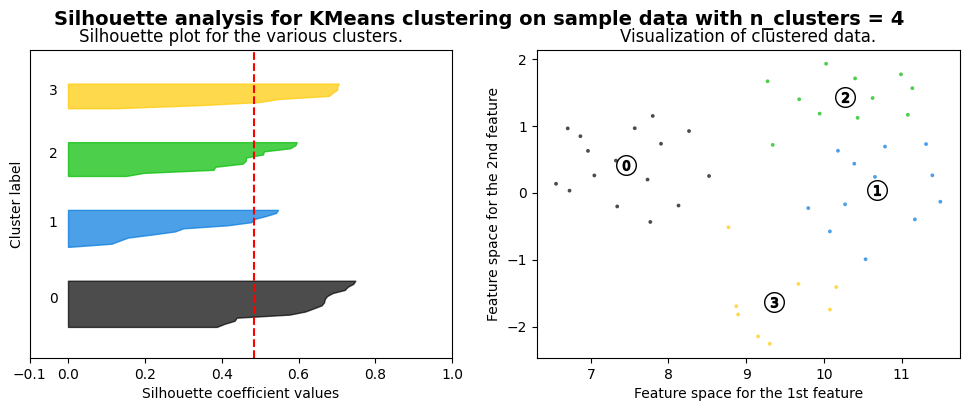

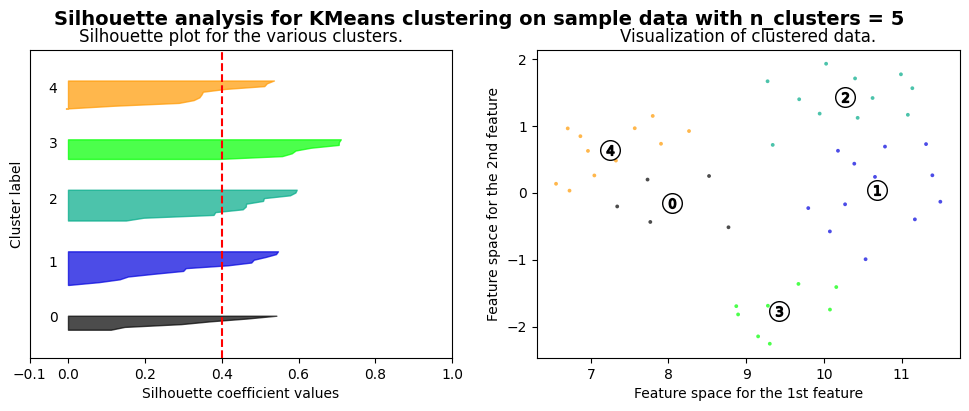

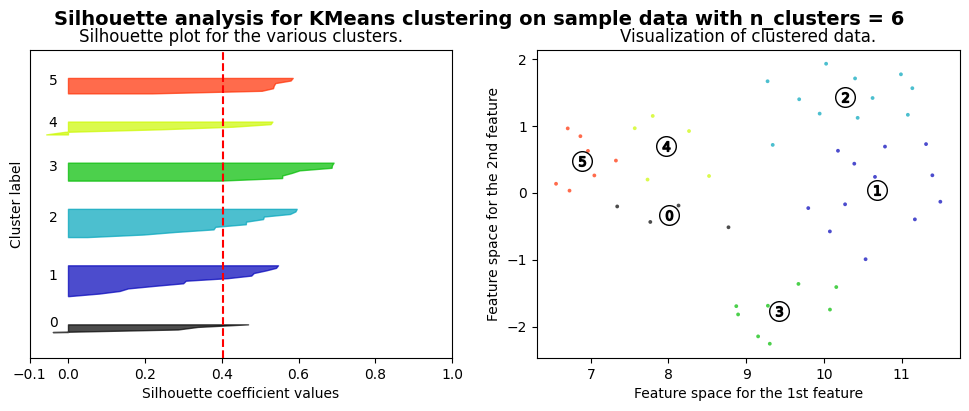

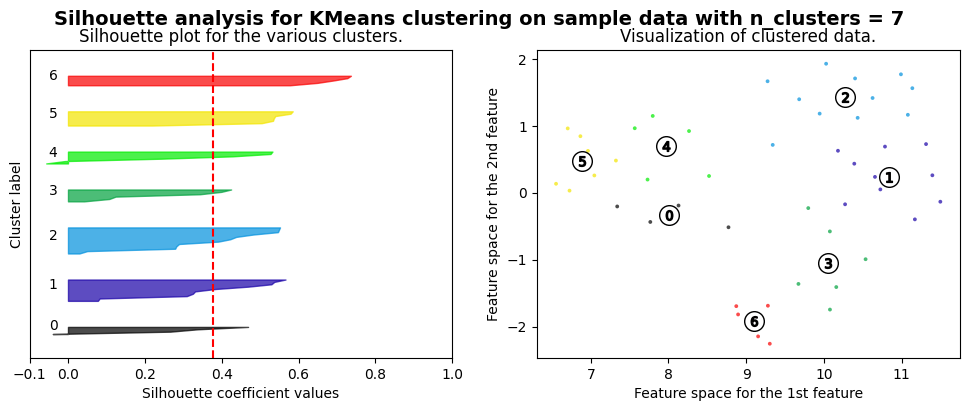

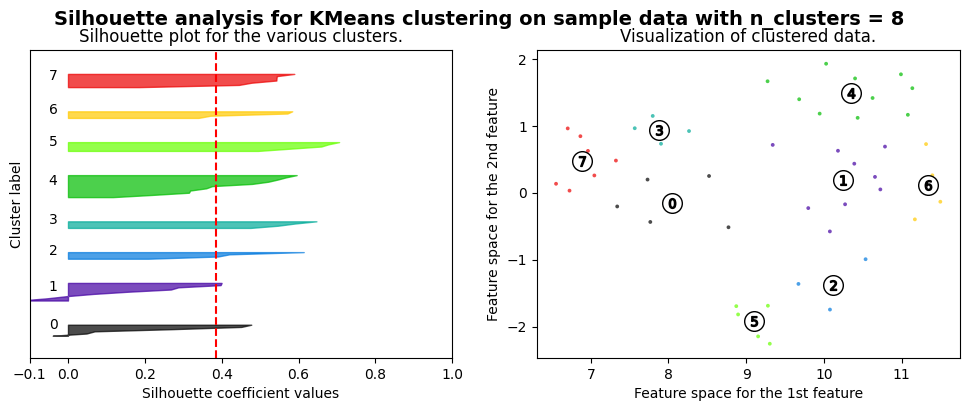

In [ ]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_umap) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_umap)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_umap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_umap[:, 0], X_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels_umap = kmeans.fit_predict(X_umap)

In [ ]:
silhouette_avg = silhouette_score(X_umap, cluster_labels_umap)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.536516010761261


In [ ]:
ch_score = calinski_harabasz_score(X_umap, cluster_labels_umap)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 83.80438852341229


In [ ]:
db_score = davies_bouldin_score(X_umap, cluster_labels_umap)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.6272431663556722


In [ ]:
umap_df= demographics.copy()

In [ ]:
umap_df['Cluster'] = cluster_labels_umap

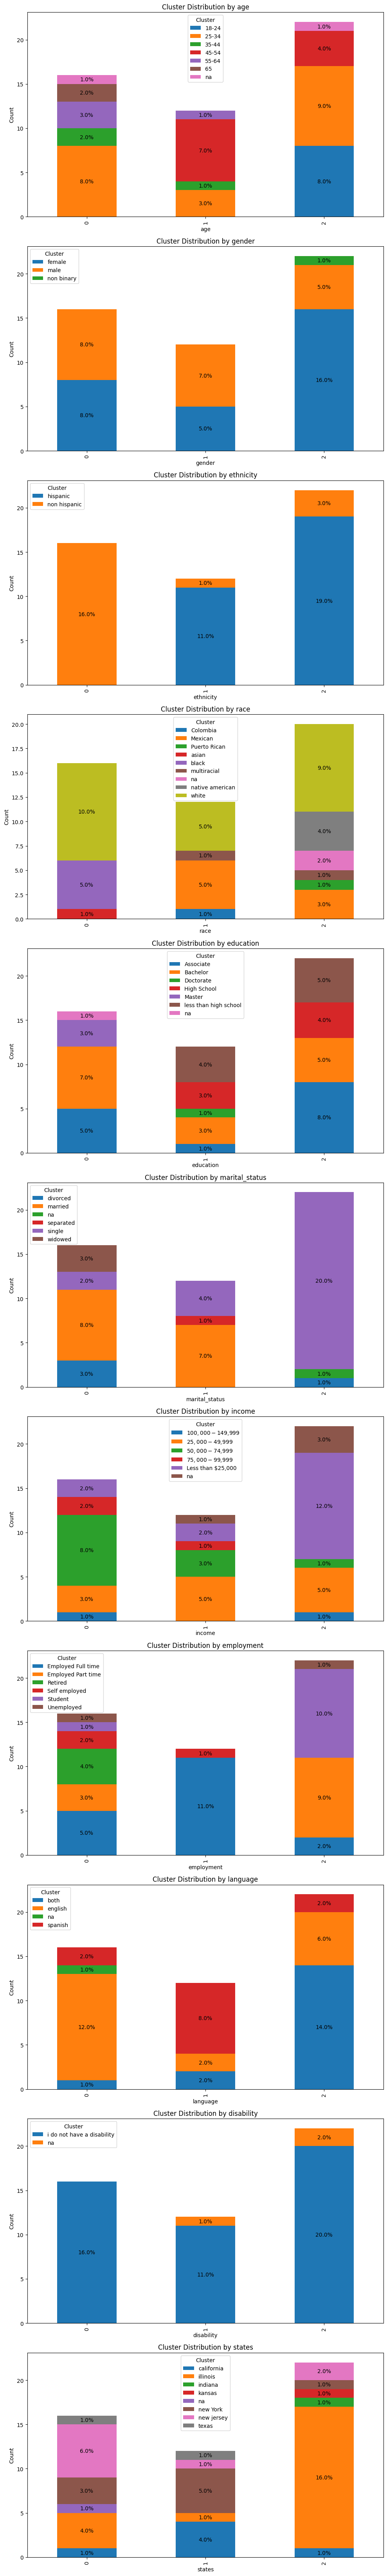

In [ ]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = umap_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')

plt.tight_layout()
plt.show()